<span style="font-size: 24px;">Finding the Critical Temperature </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
import os
from matplotlib.patches import Ellipse

2025-11-26 14:09:23.542190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# loading the Test dataset that was saved for classification
Train = np.load("../preprocessed_data/test_data.npz")
X_test = Train['X_test']
y_test = Train['y_test']

In [3]:
# loading   the  predictions of the phase on Test set with a cut =0.5
best_predict = np.load(f"../predictions/predict_cut_{0.5}.npz")
y_pred_phase = best_predict['pred']

In [4]:
# Loading the weights for regression and predicting on Test set for classification

model_path = "../src/best_model/best_cnn_model_reg.h5"
model = keras.models.load_model(model_path)
y_pred_reg = model.predict(X_test, verbose=0) 

2025-11-26 14:09:33.918896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<span style="font-size: 24px;">Predicted Phase vs Predicted Temperature on the Test Set </span>

The highlighted region is where the transition takes place( both phase 0 and phase 1 existing at the same temperature). It is between 2 and 2.5 temperature units. This region bounds the actual physics transition temperature of 2.269 units. This shows that CNN did well to identify such a phase transition :)

Note : {-1, 1} of actual data set normalized to {0, 1} during preprocessing

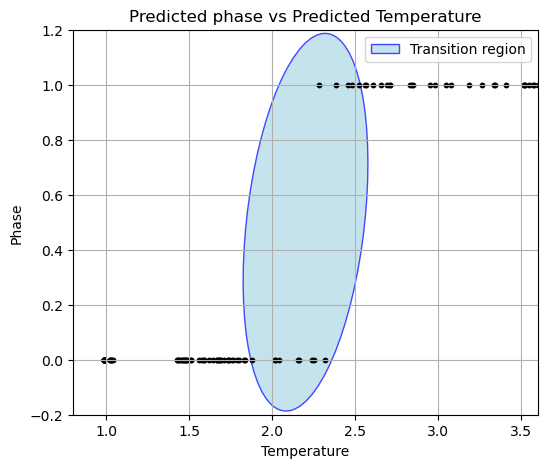

In [6]:

# Ellipse parameters
center_x = 2.2
center_y = 0.5
width  = 1.4
height = 0.7
angle  = 77

ellipse = Ellipse((center_x, center_y), width, height, angle=angle,
                  facecolor='lightblue', edgecolor='blue', alpha=0.7,label = 'Transition region')

# Create figure + axis
fig, ax = plt.subplots(figsize=(6,5))

# Add the ellipse
ax.add_patch(ellipse)

# Plot the predicted points
Temp_pred  = np.squeeze(y_pred_reg)
Phase_pred = np.squeeze(y_pred_phase)

ax.scatter(Temp_pred, Phase_pred, color='black', s=10)

# Labels
ax.set_title("Predicted phase vs Predicted Temperature")
ax.set_xlabel("Temperature")
ax.set_ylabel("Phase")

# Adjust limits of elleipse
ax.set_xlim(center_x - width,  center_x + width)
ax.set_ylim(center_y - height, center_y + height)

plt.grid(True)
plt.legend()
plt.show()